In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge  



import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\DS salary\Data\ds_salaries.csv")
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df = df.drop(columns=[col for col in df.columns if col not in ['salary_in_usd','work_year', 'experience_level', 'company_size', 'job_title', 'employee_residence']])
df

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_size
0,2023,SE,Principal Data Scientist,85847,ES,L
1,2023,MI,ML Engineer,30000,US,S
2,2023,MI,ML Engineer,25500,US,S
3,2023,SE,Data Scientist,175000,CA,M
4,2023,SE,Data Scientist,120000,CA,M
...,...,...,...,...,...,...
3750,2020,SE,Data Scientist,412000,US,L
3751,2021,MI,Principal Data Scientist,151000,US,L
3752,2020,EN,Data Scientist,105000,US,S
3753,2020,EN,Business Data Analyst,100000,US,L


# Spilt

In [4]:
target = "salary_in_usd"
y =df[target]
X =df.drop(['salary_in_usd'],axis=1)

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Baseline

In [6]:
y_mean =y_train.mean()
y_mean
y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 138055.99
Baseline MAE: 49169.95


# Build Model

In [7]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
clf =make_pipeline(OrdinalEncoder(),GradientBoostingRegressor(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])


In [8]:
params = {
    'gradientboostingregressor__n_estimators':range(20,31,5),
    'gradientboostingregressor__max_depth':range(2,5)

}
params

{'gradientboostingregressor__n_estimators': range(20, 31, 5),
 'gradientboostingregressor__max_depth': range(2, 5)}

In [9]:
from sklearn.model_selection import GridSearchCV


model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': range(2, 5),
                         'gradientboostingregressor__n_estimators': range(20, 31, 5)},
             verbose=1)

In [10]:
# Train model
model.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__max_depth': range(2, 5),
                         'gradientboostingregressor__n_estimators': range(20, 31, 5)},
             verbose=1)

In [11]:
cv_results =pd.DataFrame(model.cv_results_)
cv_results_sorted = cv_results.sort_values(by='rank_test_score')
cv_results_sorted

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.099799,0.004790,0.011999,0.002279,4,30,"{'gradientboostingregressor__max_depth': 4, 'g...",0.335984,0.404479,0.376496,0.429043,0.472118,0.403624,0.046151,1
7,0.104999,0.006723,0.015200,0.001938,4,25,"{'gradientboostingregressor__max_depth': 4, 'g...",0.333806,0.398041,0.371230,0.422449,0.465151,0.398136,0.044597,2
6,0.105198,0.004215,0.018201,0.000748,4,20,"{'gradientboostingregressor__max_depth': 4, 'g...",0.328793,0.388127,0.360736,0.413628,0.448850,0.388027,0.041493,3
5,0.143198,0.008863,0.020200,0.001939,3,30,"{'gradientboostingregressor__max_depth': 3, 'g...",0.311797,0.379213,0.355396,0.421737,0.450987,0.383826,0.048919,4
4,0.114599,0.007417,0.021800,0.003544,3,25,"{'gradientboostingregressor__max_depth': 3, 'g...",0.303647,0.371698,0.340837,0.412040,0.437362,0.373117,0.047984,5
3,0.114399,0.012239,0.021200,0.002401,3,20,"{'gradientboostingregressor__max_depth': 3, 'g...",0.290652,0.358479,0.327352,0.393329,0.421104,0.358183,0.046272,6
2,0.157199,0.037765,0.026398,0.010461,2,30,"{'gradientboostingregressor__max_depth': 2, 'g...",0.282157,0.350077,0.324680,0.395395,0.422128,0.354887,0.049775,7
1,0.140999,0.010120,0.026801,0.003542,2,25,"{'gradientboostingregressor__max_depth': 2, 'g...",0.266826,0.332816,0.312608,0.380302,0.400478,0.338606,0.047809,8
0,0.149198,0.022663,0.027202,0.006143,2,20,"{'gradientboostingregressor__max_depth': 2, 'g...",0.250339,0.312354,0.294652,0.355617,0.373122,0.317217,0.043830,9


In [12]:
mask=cv_results['rank_test_score']==1
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.099799,0.00479,0.011999,0.002279,4,30,"{'gradientboostingregressor__max_depth': 4, 'g...",0.335984,0.404479,0.376496,0.429043,0.472118,0.403624,0.046151,1


In [13]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingregressor__max_depth': 4,
 'gradientboostingregressor__n_estimators': 30}

In [14]:
model.best_score_

0.4036240918044249

In [15]:
model.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['experience_level', 'job_title',
                                      'employee_residence', 'company_size'],
                                mapping=[{'col': 'experience_level',
                                          'data_type': dtype('O'),
                                          'mapping': SE     1
MI     2
EN     3
EX     4
NaN   -2
dtype: int64},
                                         {'col': 'job_title',
                                          'data_type': dtype('O'),
                                          'mapping': Data Engineer                1
Research Scientist           2
Data Analyst                 3
Data Scientist               4
Data Science Consultan...
BI Data Engineer            85
NaN                         -2
Length: 86, dtype: int64},
                                         {'col': 'employee_residence',
                                          'data_type': dtype('O'),
                                          'mapping': ES      1
US      2
GB      3
CA      4
BO      5
       ..
BA     71
RS     72
BG     73
EE     74
NaN    -2
Length: 75, dtype: int64},
                                         {'col': 'company_size',
                                          'data_type': dtype('O'),
                                          'mapping': M      1
S      2
L      3
NaN   -2
dtype: int64}])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=30,
                                           random_state=42))])

# Evaluate

In [16]:
y_pred_training =model.predict(X_train)
y_pred_test =model.predict(X_test)
mae_training =mean_absolute_error(y_train,y_pred_training)
mae_test =mean_absolute_error(y_test,y_pred_test)
print("Baseline MAE:", round(mae_baseline, 2))
print("Training MAE:", round(mae_training, 2))
print("Test MAE:", round(mae_test, 2))


Baseline MAE: 49169.95
Training MAE: 35539.17
Test MAE: 37509.02


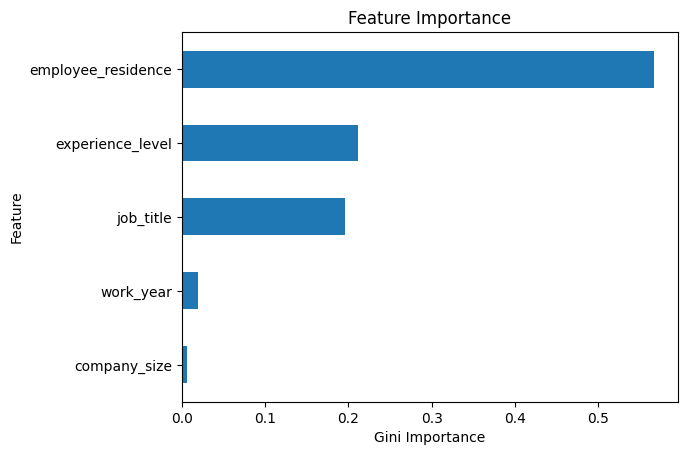

In [18]:
# Get feature names from training data
features =X_train.columns
# Extract importances from model
importances =model.best_estimator_.named_steps[
    'gradientboostingregressor'
].feature_importances_
# Create a series with feature names and importances
feat_imp =pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()